In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('./data/IMDB-Movie-Dataset(2023-1951).csv').iloc[:,1:]

In [3]:
df['year'] = df['year'].fillna(0)

In [4]:
def movie_name(movie, year):
    if(year == 0):
        return movie 
    else:
        return movie + " (" + str(year) + ')'

df['movie'] = df.apply(lambda x: movie_name(x['movie_name'], x['year']), axis=1)

In [5]:
df.head()

,movie_id,movie_name,year,genre,overview,director,cast,movie
0,tt15354916,Jawan,2023,"Action, Thriller",A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",Jawan (2023)
1,tt15748830,Jaane Jaan,2023,"Crime, Drama, Mystery",A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",Jaane Jaan (2023)
2,tt11663228,Jailer,2023,"Action, Comedy, Crime",A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"Comedy, Drama, Family",Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,"Comedy, Drama",An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",OMG 2 (2023)


In [6]:
df.shape

(2199, 8)

In [7]:
def convert_genre(str):
    list = []
    for x in str.split(','):
        list.append(x.strip().lower().replace(' ',''))
    return (" ".join(list))
    
df['genre'] = df['genre'].apply(convert_genre)

In [8]:
df.head()

,movie_id,movie_name,year,genre,overview,director,cast,movie
0,tt15354916,Jawan,2023,action thriller,A high-octane action thriller which outlines t...,Atlee,"Shah Rukh Khan, Nayanthara, Vijay Sethupathi, ...",Jawan (2023)
1,tt15748830,Jaane Jaan,2023,crime drama mystery,A single mother and her daughter who commit a ...,Sujoy Ghosh,"Kareena Kapoor, Jaideep Ahlawat, Vijay Varma, ...",Jaane Jaan (2023)
2,tt11663228,Jailer,2023,action comedy crime,A retired jailer goes on a manhunt to find his...,Nelson Dilipkumar,"Rajinikanth, Mohanlal, Shivarajkumar, Jackie S...",Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,comedy drama family,Flamboyant Punjabi Rocky and intellectual Beng...,Karan Johar,"Ranveer Singh, Alia Bhatt, Dharmendra, Shabana...",Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,comedy drama,An unhappy civilian asks the court to mandate ...,Amit Rai,"Pankaj Tripathi, Akshay Kumar, Yami Gautam, Pa...",OMG 2 (2023)


In [9]:
df['overview'] = df['overview'].apply(lambda x : x.lower())

In [10]:
df['director'] = df['director'].apply(lambda x : x.replace(' ','').lower())

In [11]:
df['cast'] = df['cast'].apply(convert_genre)

In [12]:
df.head()

,movie_id,movie_name,year,genre,overview,director,cast,movie
0,tt15354916,Jawan,2023,action thriller,a high-octane action thriller which outlines t...,atlee,shahrukhkhan nayanthara vijaysethupathi deepik...,Jawan (2023)
1,tt15748830,Jaane Jaan,2023,crime drama mystery,a single mother and her daughter who commit a ...,sujoyghosh,kareenakapoor jaideepahlawat vijayvarma saurab...,Jaane Jaan (2023)
2,tt11663228,Jailer,2023,action comedy crime,a retired jailer goes on a manhunt to find his...,nelsondilipkumar,rajinikanth mohanlal shivarajkumar jackieshroff,Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,comedy drama family,flamboyant punjabi rocky and intellectual beng...,karanjohar,ranveersingh aliabhatt dharmendra shabanaazmi,Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,comedy drama,an unhappy civilian asks the court to mandate ...,amitrai,pankajtripathi akshaykumar yamigautam pawanmal...,OMG 2 (2023)


In [13]:
df['tags'] = df['movie'] + ' ' + df['genre'] + ' ' + df['overview'] + ' ' + df['director'] + ' ' + df['cast']

In [14]:
df.head()

,movie_id,movie_name,year,genre,overview,director,cast,movie,tags
0,tt15354916,Jawan,2023,action thriller,a high-octane action thriller which outlines t...,atlee,shahrukhkhan nayanthara vijaysethupathi deepik...,Jawan (2023),Jawan (2023) action thriller a high-octane act...
1,tt15748830,Jaane Jaan,2023,crime drama mystery,a single mother and her daughter who commit a ...,sujoyghosh,kareenakapoor jaideepahlawat vijayvarma saurab...,Jaane Jaan (2023),Jaane Jaan (2023) crime drama mystery a single...
2,tt11663228,Jailer,2023,action comedy crime,a retired jailer goes on a manhunt to find his...,nelsondilipkumar,rajinikanth mohanlal shivarajkumar jackieshroff,Jailer (2023),Jailer (2023) action comedy crime a retired ja...
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,comedy drama family,flamboyant punjabi rocky and intellectual beng...,karanjohar,ranveersingh aliabhatt dharmendra shabanaazmi,Rocky Aur Rani Kii Prem Kahaani (2023),Rocky Aur Rani Kii Prem Kahaani (2023) comedy ...
4,tt15732324,OMG 2,2023,comedy drama,an unhappy civilian asks the court to mandate ...,amitrai,pankajtripathi akshaykumar yamigautam pawanmal...,OMG 2 (2023),OMG 2 (2023) comedy drama an unhappy civilian ...


In [15]:
df = df[['movie_id', 'movie_name', 'year', 'tags', 'movie']]

In [16]:
df.head()

,movie_id,movie_name,year,tags,movie
0,tt15354916,Jawan,2023,Jawan (2023) action thriller a high-octane act...,Jawan (2023)
1,tt15748830,Jaane Jaan,2023,Jaane Jaan (2023) crime drama mystery a single...,Jaane Jaan (2023)
2,tt11663228,Jailer,2023,Jailer (2023) action comedy crime a retired ja...,Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,Rocky Aur Rani Kii Prem Kahaani (2023) comedy ...,Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,OMG 2 (2023) comedy drama an unhappy civilian ...,OMG 2 (2023)


In [17]:
import nltk
import string
from nltk.stem.porter import PorterStemmer

In [18]:
df['tags'] = df['tags'].apply(lambda x : nltk.word_tokenize(x))

In [19]:
ps = PorterStemmer()

In [20]:
df.head()

,movie_id,movie_name,year,tags,movie
0,tt15354916,Jawan,2023,"[Jawan, (, 2023, ), action, thriller, a, high-...",Jawan (2023)
1,tt15748830,Jaane Jaan,2023,"[Jaane, Jaan, (, 2023, ), crime, drama, myster...",Jaane Jaan (2023)
2,tt11663228,Jailer,2023,"[Jailer, (, 2023, ), action, comedy, crime, a,...",Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,"[Rocky, Aur, Rani, Kii, Prem, Kahaani, (, 2023...",Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,"[OMG, 2, (, 2023, ), comedy, drama, an, unhapp...",OMG 2 (2023)


In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aneka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aneka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
def transform_text(x):
    y = []
    for i in x:
        if i.isalnum(): 
            y.append(i)
    text = y[:]
    y.clear()  
          
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()  
            
    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)    

df['tags'] = df['tags'].apply(transform_text)

In [23]:
df.head()

,movie_id,movie_name,year,tags,movie
0,tt15354916,Jawan,2023,jawan 2023 action thriller action thriller out...,Jawan (2023)
1,tt15748830,Jaane Jaan,2023,jaan jaan 2023 crime drama mysteri singl mothe...,Jaane Jaan (2023)
2,tt11663228,Jailer,2023,jailer 2023 action comedi crime retir jailer g...,Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,rocki aur rani kii prem kahaani 2023 comedi dr...,Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,omg 2 2023 comedi drama unhappi civilian ask c...,OMG 2 (2023)


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(max_features=5000)

In [27]:
vectors = cv.fit_transform(df['tags']).toarray()

In [28]:
def fit_predict(x):
    about = df[df['movie_name']==x]
    about_index = about.index[0]
    new_df = df.iloc[about_index]
    print(new_df)
    
    user_vector = cv.transform([new_df['tags']])
    similarities = cosine_similarity(user_vector, vectors)
    similarities = similarities[0] * 100
    final_similars = list(enumerate(similarities))
    final_similars = sorted(final_similars,reverse=True, key= lambda x : x[1])[1:6]
    
    finals = []
    for tuple in final_similars:
        print(tuple)
        index = tuple[0]
        temp = df.iloc[index]
        finals.append(temp)
    return finals

In [29]:
temp = fit_predict('War')

movie_id                                              tt7430722
movie_name                                                  War
year                                                       2019
tags          war 2019 action adventur thriller indian agent...
movie                                                War (2019)
Name: 155, dtype: object
(8, 31.622776601683793)
(314, 31.201886037669148)
(500, 29.462782549439474)
(568, 27.735009811261456)
(1892, 25.724787771376324)


In [30]:
for i in temp:
    print(i['movie_name'])

Pathaan
Dhaakad
War 2
Agent Vinod
Haqeeqat


In [31]:
df.head()

,movie_id,movie_name,year,tags,movie
0,tt15354916,Jawan,2023,jawan 2023 action thriller action thriller out...,Jawan (2023)
1,tt15748830,Jaane Jaan,2023,jaan jaan 2023 crime drama mysteri singl mothe...,Jaane Jaan (2023)
2,tt11663228,Jailer,2023,jailer 2023 action comedi crime retir jailer g...,Jailer (2023)
3,tt14993250,Rocky Aur Rani Kii Prem Kahaani,2023,rocki aur rani kii prem kahaani 2023 comedi dr...,Rocky Aur Rani Kii Prem Kahaani (2023)
4,tt15732324,OMG 2,2023,omg 2 2023 comedi drama unhappi civilian ask c...,OMG 2 (2023)


In [32]:
movies = df[['movie', 'movie_id']]

In [33]:
movies

,movie,movie_id
0,Jawan (2023),tt15354916
1,Jaane Jaan (2023),tt15748830
2,Jailer (2023),tt11663228
3,Rocky Aur Rani Kii Prem Kahaani (2023),tt14993250
4,OMG 2 (2023),tt15732324
...,...,...
2194,Heeriye,tt11112474
2195,Sur: The Melody of Life (2002),tt0332766
2196,Time to Dance (2021),tt8622232
2197,Nigahen: Nagina Part II (1989),tt0187351


In [34]:
import pickle

In [35]:
movies = movies.to_dict()
pickle.dump(movies, open('movies.pkl', 'wb'))

In [36]:
pickle.dump(df, open('dataframe.pkl', 'wb'))

In [37]:
pickle.dump(vectors,open(
    'vectors.pkl','wb'
))

In [38]:
pickle.dump(cv,open(
    'counter.pkl','wb'
))

In [1]:
import requests
from bs4 import BeautifulSoup
import json

In [2]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'} 

In [41]:
data = requests.get("https://www.imdb.com/title/tt12844910/", headers=headers).text

In [42]:
soup = BeautifulSoup(data, 'lxml')

In [43]:
writer_html = soup.find_all('li', class_='ipc-metadata-list__item')
final_writers = []
for writers in writer_html:
    if (writers.text.find('Writers') > -1):
        for writer in writers.find_all('a', class_='ipc-metadata-list-item__list-content-item--link'):
            final_writers.append(writer.text)
        break
print(final_writers)    

['Shridhar Raghavan', 'Abbas Tyrewala', 'Siddharth Anand']


In [44]:
stars_html = soup.find_all('li', class_='ipc-metadata-list-item--link')
stars_data = ""
for str in stars_html:
    if(str.text.find('Stars')>-1):
        stars_data = str
        break
final_stars = []
for writer in stars_data.find_all('a', class_='ipc-metadata-list-item__list-content-item--link'):
    final_stars.append(writer.text)
final_stars

['Shah Rukh Khan', 'Deepika Padukone', 'John Abraham']

In [45]:
writer_html = soup.find_all('li', class_='ipc-metadata-list-item--link')
writer_data = ""
for writers in writer_html:
    if (writers.text.find('Writers') > -1):
        writer_data = writers
        break
final_writers = []
for writer in writer_data.find_all('a', class_='ipc-metadata-list-item__list-content-item--link'):
    final_writers.append(writer.text)
final_writers

AttributeError: 'str' object has no attribute 'find_all'

In [ ]:
titles = soup.find_all('a', class_='ipc-chip--on-baseAlt')
title_data = []
for x in titles:
    title_data.append(x.text)
title_data

['Action', 'Adventure', 'Thriller']

In [ ]:
soup.find_all('span', class_='sc-466bb6c-2 chnFO')[0].text

"Indian agent Khalid goes on a mission to hunt and eliminate his former mentor, the country's top agent Kabir who has gone rogue. A deadly war begins."

In [ ]:
soup.find('span', class_='ipc-metadata-list-item__list-content-item').text

'25 wins & 19 nominations'

In [ ]:
filmfare = soup.find_all('div', class_='ipc-html-content-inner-div')
award = ""
for film in filmfare:
    film = film.find_all('a', class_='ipc-link ipc-link--base')
    if film :
        if film[0].text.find('Amazon') > -1:
            award = film[0].text
print(award)

65th Amazon Filmfare Awards


In [ ]:
music_by = soup.find_all("div", class_='ipc-html-content-inner-div')
music_data = []
for music in music_by:
    if music.find('span'):
        music_by = (music)
        break
for str in music_by:
    music_by.append(str)

In [ ]:
soup.find_all('div', class_='sc-bde20123-3')[0].text

'33K'

In [ ]:
json.loads(soup.find_all('script', type='application/ld+json')[0].string)['aggregateRating']['ratingValue']

6.5

In [ ]:
json.loads(soup.find_all('script', type='application/ld+json')[0].string)['image']

'https://m.media-amazon.com/images/M/MV5BNjE1MWFhZTQtNTY4Ni00MWY3LTlhZjUtNDIzOTdlMTUzMzAxXkEyXkFqcGdeQXVyMTkzOTcxOTg@._V1_.jpg'

In [ ]:
soup.find_all('a', class_="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link")[0].text

'Siddharth Anand'

In [ ]:
actors = soup.find_all('div', class_='sc-bfec09a1-5')
actors_data = []
for actor in actors:
    name = actor.find('a', class_='sc-bfec09a1-1').text
    character = actor.find('a', class_='sc-bfec09a1-2')
    if character is not None:
        character = character.text
    else:
        character = None
    img = actor.find('img')
    image = 'https://cdn.pixabay.com/photo/2015/10/05/22/37/blank-profile-picture-973460_960_720.png'
    if img is not None:
        image = img['srcset'].split(',')[-4]
    dict = {
        'name': name,
        'character': character,
        'image':image
    }  
    actors_data.append(dict)     

In [3]:
reviews = requests.get('https://www.imdb.com/title/tt7430722/reviews?ref_=tt_urv',headers=headers).text

In [4]:
reviews = BeautifulSoup(reviews, 'lxml')

In [5]:
reviews

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b.logLevel;c&&c!==k&&c!==m&&c!==n&&c!==p||a.ec++;c&&c!=k||a.ecf++;b.pageURL="

In [6]:
reviews_data = reviews.find_all('div',class_='lister-item')

In [7]:
reviews_data[0]

<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5215238" data-vote-url="/title/tt7430722/review/rw5215238/vote/interesting">
<div class="review-container">
<div class="lister-item-content">
<div class="ipl-ratings-bar">
<span class="rating-other-user-rating">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
<span>7</span><span class="point-scale">/10</span>
</span>
</div>
<a class="title" href="/review/rw5215238/?ref_=tt_urv"> Epic action movie with an overdose of twists and turns
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur22956348/?ref_=tt_urv">kluseba</a></span><span class="review-date">26 October 2019</span>
</div>
<div class="

In [8]:
final_review_data = []
for review in reviews_data:
    title = review.find_all('a', class_='title')[0].text.strip()
    date = review.find_all('span', class_='review-date')[0].text.strip()
    a_data = review.find_all('div', class_='show-more__control')[0].text
    rating = review.find('span', class_='rating-other-user-rating')
    rating = rating.find('span').text
    name = review.find_all('span', class_='display-name-link')[0].text
    dictionary = {
        'title': title,
        'date': date,
        'review': a_data,
        'rating': rating,
        'name':name
    }
    final_review_data.append(dictionary)

In [9]:
final_review_data

[{'title': 'Epic action movie with an overdose of twists and turns',
  'date': '26 October 2019',
  'review': "War is an Indian action-thriller about a soldier who has to eliminate his former mentor who has gone rogue and starts assassinating influential targets around the world for mysterious reasons.The movie convinces on numerous levels. The story comes around with numerous surprising twists and turns that will keep the spectators on the edge of their seats until the very end. Most of the characters have interesting background stories, convictions and motives which make the two lead characters progressively more profound as the movie unfolds in particular. The action scenes are spectacular and vary from explosive car chases to combats in an old church that has fallen into disrepair. The special effects have been designed with care as the camera work and light techniques are very solid except from one unnecessarily nauseating scene in a conference room. The beautiful locations and se

In [10]:
import pandas as pd

In [11]:
reviews_df = pd.DataFrame(final_review_data)

In [25]:
reviews_df

,title,date,review,rating,name
0,Epic action movie with an overdose of twists a...,26 October 2019,War is an Indian action-thriller about a soldi...,7,kluseba
1,Bollywood has now Raised the Bar in Action!,11 December 2019,"Finally a Bollywood movie, that can seriously ...",7,SoumikBanerjee1996
2,Hrithik-Tiger team up👍,7 December 2019,Was waiting for all these years to watch Hrith...,10,imdb_girl90
3,All Style and No Substance.,2 October 2019,To say that War has a wafer-thin plot is an un...,4,SinhaSomesh
4,Logical viewers - please keep your brain out o...,28 November 2019,Please make sure your brain is on sleep mode w...,1,neetabora
5,Really Great Movie,9 October 2019,WarA really great Bollywood movie from start t...,7,martimusross
6,Tremendous form over substance,2 October 2019,WAR - When the best intelligence service agent...,6,msunando
7,dont blame me if it tastes insipid,3 October 2019,I had lots of time to kill so i decided to coo...,4,beevenkat
8,Terrible Music blasting Slow motion Acrobatics...,8 October 2019,The base plot of the movie is alright and had ...,1,gulfaran786
9,Hrithik redefined who he is.,7 December 2019,7 for Hrithik and 1 for everything else. One o...,8,sharan-17084


In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aneka\AppData\Roaming\nltk_data...


True

In [56]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [28]:
scores = analyzer.polarity_scores(reviews_df['review'][0])

In [61]:
def positive(str):
    scores = analyzer.polarity_scores(str)
    return scores['pos']*100

def negative(str):
    scores = analyzer.polarity_scores(str)
    return scores['neg']*100

def neutral(str):
    scores = analyzer.polarity_scores(str)
    return scores['neu']*100

reviews_df['positive'] = reviews_df['review'].apply(positive)
reviews_df['negative'] = reviews_df['review'].apply(negative)
reviews_df['neutral'] = reviews_df['review'].apply(neutral)

In [62]:
reviews_df

,title,date,review,rating,name,positive,negative,neutral
0,Epic action movie with an overdose of twists a...,26 October 2019,War is an Indian action-thriller about a soldi...,7,kluseba,11.6,7.1,81.3
1,Bollywood has now Raised the Bar in Action!,11 December 2019,"Finally a Bollywood movie, that can seriously ...",7,SoumikBanerjee1996,18.2,9.2,72.5
2,Hrithik-Tiger team up👍,7 December 2019,Was waiting for all these years to watch Hrith...,10,imdb_girl90,10.3,0.0,89.7
3,All Style and No Substance.,2 October 2019,To say that War has a wafer-thin plot is an un...,4,SinhaSomesh,13.3,15.2,71.5
4,Logical viewers - please keep your brain out o...,28 November 2019,Please make sure your brain is on sleep mode w...,1,neetabora,10.2,23.2,66.7
5,Really Great Movie,9 October 2019,WarA really great Bollywood movie from start t...,7,martimusross,23.5,15.2,61.3
6,Tremendous form over substance,2 October 2019,WAR - When the best intelligence service agent...,6,msunando,16.8,10.9,72.3
7,dont blame me if it tastes insipid,3 October 2019,I had lots of time to kill so i decided to coo...,4,beevenkat,25.6,12.2,62.2
8,Terrible Music blasting Slow motion Acrobatics...,8 October 2019,The base plot of the movie is alright and had ...,1,gulfaran786,11.1,6.4,82.4
9,Hrithik redefined who he is.,7 December 2019,7 for Hrithik and 1 for everything else. One o...,8,sharan-17084,9.1,0.0,90.9


In [29]:
scores

{'neg': 0.071, 'neu': 0.813, 'pos': 0.116, 'compound': 0.9244}

In [46]:
del scores['compound']

In [47]:
labels = scores.keys()
sizes = scores.values()

In [53]:
print(labels)
print(sizes)

dict_keys(['neg', 'neu', 'pos'])
dict_values([0.071, 0.813, 0.116])


In [49]:
import matplotlib.pyplot as plt

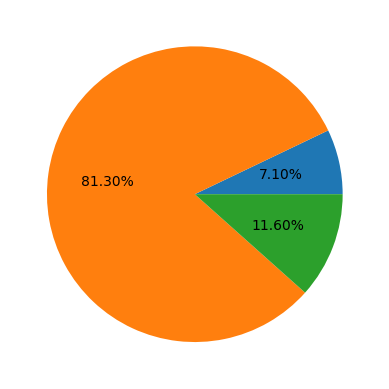

In [55]:
plt.pie(sizes, autopct='%1.2f%%')
plt.show()